In [1]:
import pandas as pd
from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./../data/Diabetes-Data.csv')

In [3]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


## Outlier Detection

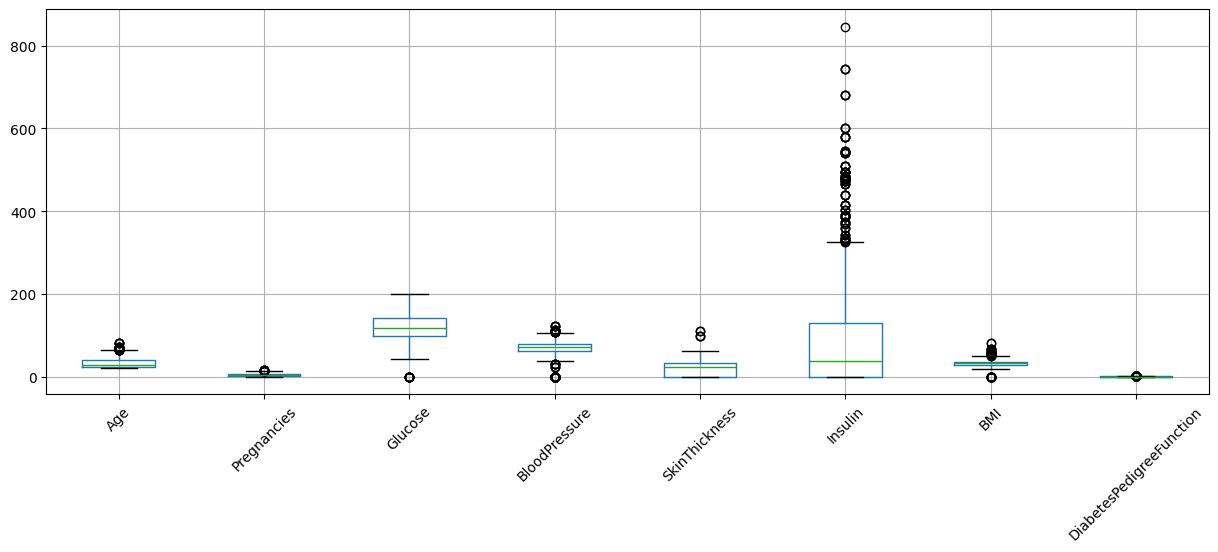

In [4]:
plt.figure(figsize=(15, 5))
df.boxplot(column=['Age', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'])

plt.xticks(rotation=45)
plt.show()

In [5]:
# Examining outliers in detail
def analyze_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"\n{column}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Outlier range: {df[column].min():.2f} - {df[column].max():.2f}")
    
    return outliers

# Analyze outliers for numeric columns
numeric_columns = ['Age', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

for col in numeric_columns:
    if col in df.columns:
        outliers = analyze_outliers(df, col)


Age:
  Q1: 24.00, Q3: 40.00, IQR: 16.00
  Lower bound: 0.00, Upper bound: 64.00
  Number of outliers: 64 (2.31%)
  Outlier range: 21.00 - 81.00

Pregnancies:
  Q1: 1.00, Q3: 6.00, IQR: 5.00
  Lower bound: -6.50, Upper bound: 13.50
  Number of outliers: 16 (0.58%)
  Outlier range: 0.00 - 17.00

Glucose:
  Q1: 99.00, Q3: 141.00, IQR: 42.00
  Lower bound: 36.00, Upper bound: 204.00
  Number of outliers: 18 (0.65%)
  Outlier range: 0.00 - 199.00

BloodPressure:
  Q1: 62.00, Q3: 80.00, IQR: 18.00
  Lower bound: 35.00, Upper bound: 107.00
  Number of outliers: 158 (5.71%)
  Outlier range: 0.00 - 122.00

SkinThickness:
  Q1: 0.00, Q3: 32.00, IQR: 32.00
  Lower bound: -48.00, Upper bound: 80.00
  Number of outliers: 5 (0.18%)
  Outlier range: 0.00 - 110.00

Insulin:
  Q1: 0.00, Q3: 130.00, IQR: 130.00
  Lower bound: -195.00, Upper bound: 325.00
  Number of outliers: 103 (3.72%)
  Outlier range: 0.00 - 846.00

BMI:
  Q1: 27.30, Q3: 36.62, IQR: 9.32
  Lower bound: 13.31, Upper bound: 50.61
  Nu

### Outlier Analysis on Diabetes Dataset

I believe we should not removing outliers for diabetes dataset for the following reasons:

### 1. **Reasons for not removing outliers:**
- High glucose levels (>180) are medically significant for diabetes diagnosis
- High BMI values indicate obesity, a major diabetes risk factor  
- High insulin levels may indicate insulin resistance
- These "outliers" are actually the most informative data points for diabetes prediction
- This diabetes datasets is not very large
- Removing outliers would reduce the training data
- Each data point represents a real patient case

### 2. **Alternative Approaches:**
Instead of removing outliers, we can consider:
1. **Robust scaling/normalization** - Use RobustScaler instead of StandardScaler
2. **Capping extreme values** - Cap at 95th or 99th percentile instead of removal
3. **Log transformation** - For skewed distributions (like Insulin)
4. **Tree-based models** - Random Forest, XGBoost are naturally robust to outliers

## Zero / Null value treatment

During exploratory data analysis (EDA), we observed that some columns such as 'Glucose', 'BloodPressure', 'SkinThickness', and 'BMI' contain zero values, which are not physiologically possible. These zeros represent missing data and should be marked as null for appropriate imputation.

In [6]:
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
df[columns_to_fix] = df[columns_to_fix].replace(0, pd.NA)

df.loc[df['Insulin'] < 3, 'Insulin'] = pd.NA

In [7]:
df.isna().sum()

Id                             0
Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

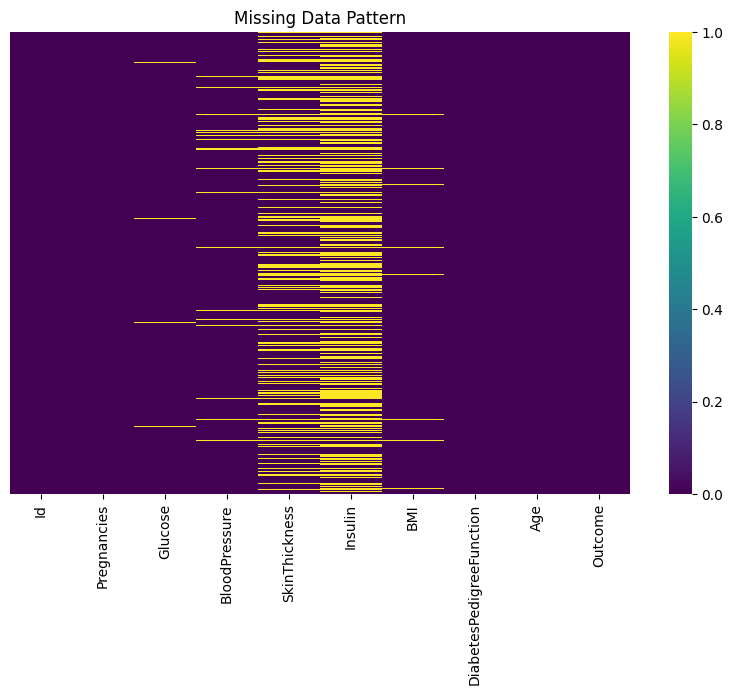

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Data Pattern')
plt.show()

In [9]:
df.dtypes

Id                            int64
Pregnancies                   int64
Glucose                      object
BloodPressure                object
SkinThickness                object
Insulin                     float64
BMI                          object
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
df.select_dtypes(include=['int', 'Int64']).columns


Index(['Id', 'Pregnancies', 'Age', 'Outcome'], dtype='object')

In [11]:
df.select_dtypes(include=['float', 'Float64']).columns

Index(['Insulin', 'DiabetesPedigreeFunction'], dtype='object')

In [12]:
df['Glucose'] = df['Glucose'].astype(pd.Int64Dtype())
df['BloodPressure'] = df['BloodPressure'].astype(pd.Int64Dtype())
df['SkinThickness'] = df['SkinThickness'].astype(pd.Int64Dtype())
df['BMI'] = df['BMI'].astype(pd.Float64Dtype())

In [13]:
df.dtypes

Id                            int64
Pregnancies                   int64
Glucose                       Int64
BloodPressure                 Int64
SkinThickness                 Int64
Insulin                     float64
BMI                         Float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### KNN Inputer

In [14]:
# KNN Imputer for all columns
impute_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
imputer = KNNImputer(n_neighbors=5)

df[impute_columns] = imputer.fit_transform(df[impute_columns])

In [15]:
df.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
df['Pregnancies'] = df['Pregnancies'].astype(pd.Int64Dtype())
df['Glucose'] = df['Glucose'].round().astype(pd.Int64Dtype())
df['BloodPressure'] = df['BloodPressure'].round().astype(pd.Int64Dtype())
df['SkinThickness'] = df['SkinThickness'].round().astype(pd.Int64Dtype())
df['Age'] = df['Age'].round().astype(pd.Int64Dtype())
df['Outcome'] = df['Outcome'].astype(pd.Int64Dtype())

df['BMI'] = df['BMI'].round(1)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].round(3)

In [17]:
df.to_csv('./../data/Diabetes-Data-Imputed.csv', index=False)